# Partie 1 – Exploratory Data Analysis (EDA)

## Objectifs

- Comprendre la forme et le contenu du dataset
- Identifier les anomalies, les valeurs aberrantes ou manquantes
- Analyser la distribution des textes et des classes

## Questions à traiter

### Structure des données
- Quelle est la forme du DataFrame ?
- Y a-t-il des valeurs manquantes ? Des doublons ?
- Quelles colonnes vont nous être utiles ?

### Qualité des données
- Existe-t-il des incohérences ou des outliers ?
- Y a-t-il des tweets anormalement courts ou longs ?

### Analyse de la cible
- Quelle est la répartition de la variable cible ?
- En regardant des tweets aléatoires, la cible semble-t-elle prévisible ?

## Plan d'analyse

1. **Vérification de la structure** : Présence et types des colonnes (`text`, `target`)
2. **Contrôle qualité** : Détection automatique de valeurs manquantes ou doublons
3. **Validation des textes** : Vérification que tous les textes sont non-vides
4. **Analyse des classes** : Validation du nombre de classes possibles
5. **Statistiques textuelles** : Test sur les longueurs de texte (moyenne, min, max)

----

In [5]:
import pandas as pd

df = pd.read_csv('../../data/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
# Check Doublons et valeurs manquantes

df.duplicated().sum(), df.isnull().sum()

(0,
 id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64)

In [10]:
# Check length of tweet
df['text'].str.len().describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text, dtype: float64

In [12]:
# take a sample of 5 random tweets with target 1 and 5 random tweets with target 0 and print text
df[df['target'] == 1].sample(5)['text'].tolist(), df[df['target'] == 0].sample(5)['text'].tolist()

(['Hmm...this could be problem for some researchers: FedEx no longer to transport select agents http://t.co/9vIibxgjAV via @usatoday',
  'Bend Post Office roofers cut gas line prompt evacuation - http://t.co/6mF7eyZOAw',
  'Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/GaotrG4mTr',
  '#NASA announced that a massive #solar storm is headed straight for us: http://t.co/CM5u55MiOl',
  '5/6 will destroy Reg C competitiveness.   The entire region will B over-saturated.   Yes Brockton gets $12M and RegC Commonwealth PPC and'],
 ['@OpTic_Scumper Yo why u so sexy?',
  'am boy @Crash_______  https://t.co/f5Ylp7pfN7',
  'Smoke it all http://t.co/79upYdCeMp',
  'Megadeth-Symphony of Destruction http://t.co/xzfxRgLAlp',
  '@camilacabello97 NOW IM INTERNALLY SCREAMING'])

In [19]:
# Let's analyze what makes tweets predictable
# First, let's look at common words in disaster vs non-disaster tweets

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

# Get words from disaster tweets (target=1) and non-disaster tweets (target=0)
disaster_words = []
non_disaster_words = []

for idx, row in df.iterrows():
    words = clean_text(row['text'])
    if row['target'] == 1:
        disaster_words.extend(words)
    else:
        non_disaster_words.extend(words)

# Get most common words for each category
disaster_common = Counter(disaster_words).most_common(20)
non_disaster_common = Counter(non_disaster_words).most_common(20)

print("Most common words in DISASTER tweets:")
for word, count in disaster_common:
    print(f"{word}: {count}")

print("\nMost common words in NON-DISASTER tweets:")
for word, count in non_disaster_common:
    print(f"{word}: {count}")

Most common words in DISASTER tweets:
the: 1363
in: 1161
a: 933
of: 927
to: 757
and: 502
on: 417
for: 399
is: 349
i: 325
at: 308
by: 276
from: 244
with: 192
that: 186
this: 181
after: 181
fire: 180
it: 176
was: 168

Most common words in NON-DISASTER tweets:
the: 1909
a: 1262
to: 1189
i: 1079
and: 918
of: 901
in: 818
you: 667
is: 595
my: 544
for: 494
on: 438
it: 393
with: 380
that: 376
this: 297
be: 288
me: 259
like: 253
by: 249


### Needs cleaning to see most frequent relevant words > preprocessing.ipynb

In [16]:
# Let's identify disaster-specific keywords and their predictive power
disaster_keywords = [
    'fire', 'earthquake', 'flood', 'storm', 'hurricane', 'tornado', 'tsunami', 
    'explosion', 'accident', 'emergency', 'rescue', 'evacuation', 'disaster',
    'crash', 'collision', 'burning', 'smoke', 'flames', 'destroyed', 'damage',
    'injured', 'casualties', 'death', 'killed', 'victims', 'survivors'
]

# Check how often these keywords appear in disaster vs non-disaster tweets
keyword_analysis = []

for keyword in disaster_keywords:
    disaster_count = df[df['target'] == 1]['text'].str.contains(keyword, case=False, na=False).sum()
    non_disaster_count = df[df['target'] == 0]['text'].str.contains(keyword, case=False, na=False).sum()
    
    total_disaster = (df['target'] == 1).sum()
    total_non_disaster = (df['target'] == 0).sum()
    
    disaster_rate = disaster_count / total_disaster * 100
    non_disaster_rate = non_disaster_count / total_non_disaster * 100
    
    if disaster_count > 0 or non_disaster_count > 0:  # Only include keywords that appear
        keyword_analysis.append({
            'keyword': keyword,
            'disaster_count': disaster_count,
            'non_disaster_count': non_disaster_count,
            'disaster_rate': disaster_rate,
            'non_disaster_rate': non_disaster_rate,
            'predictive_ratio': disaster_rate / (non_disaster_rate + 0.001)  # Add small value to avoid division by zero
        })

keyword_df = pd.DataFrame(keyword_analysis)
keyword_df = keyword_df.sort_values('predictive_ratio', ascending=False)

print("Top predictive keywords (disaster vs non-disaster):")
print(keyword_df[['keyword', 'disaster_rate', 'non_disaster_rate', 'predictive_ratio']].head(10))

Top predictive keywords (disaster vs non-disaster):
       keyword  disaster_rate  non_disaster_rate  predictive_ratio
23      killed       2.812596           0.092123         30.202872
1   earthquake       1.253439           0.138185          9.005552
24     victims       0.366860           0.046062          7.795301
11  evacuation       1.284011           0.230309          5.551073
20     injured       1.375726           0.253339          5.409015
21  casualties       0.856007           0.161216          5.276959
14   collision       0.978294           0.230309          4.229389
8     accident       2.323448           0.644864          3.597426
0         fire      10.516662           2.970981          3.538603
25   survivors       0.886579           0.253339          3.485810


<>:28: SyntaxWarning: invalid escape sequence '\?'
<>:28: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_60104/3836725025.py:28: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['text'].str.count('\?')
/tmp/ipykernel_60104/3836725025.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([disaster_caps, non_disaster_caps], labels=['Disaster', 'Non-disaster'])


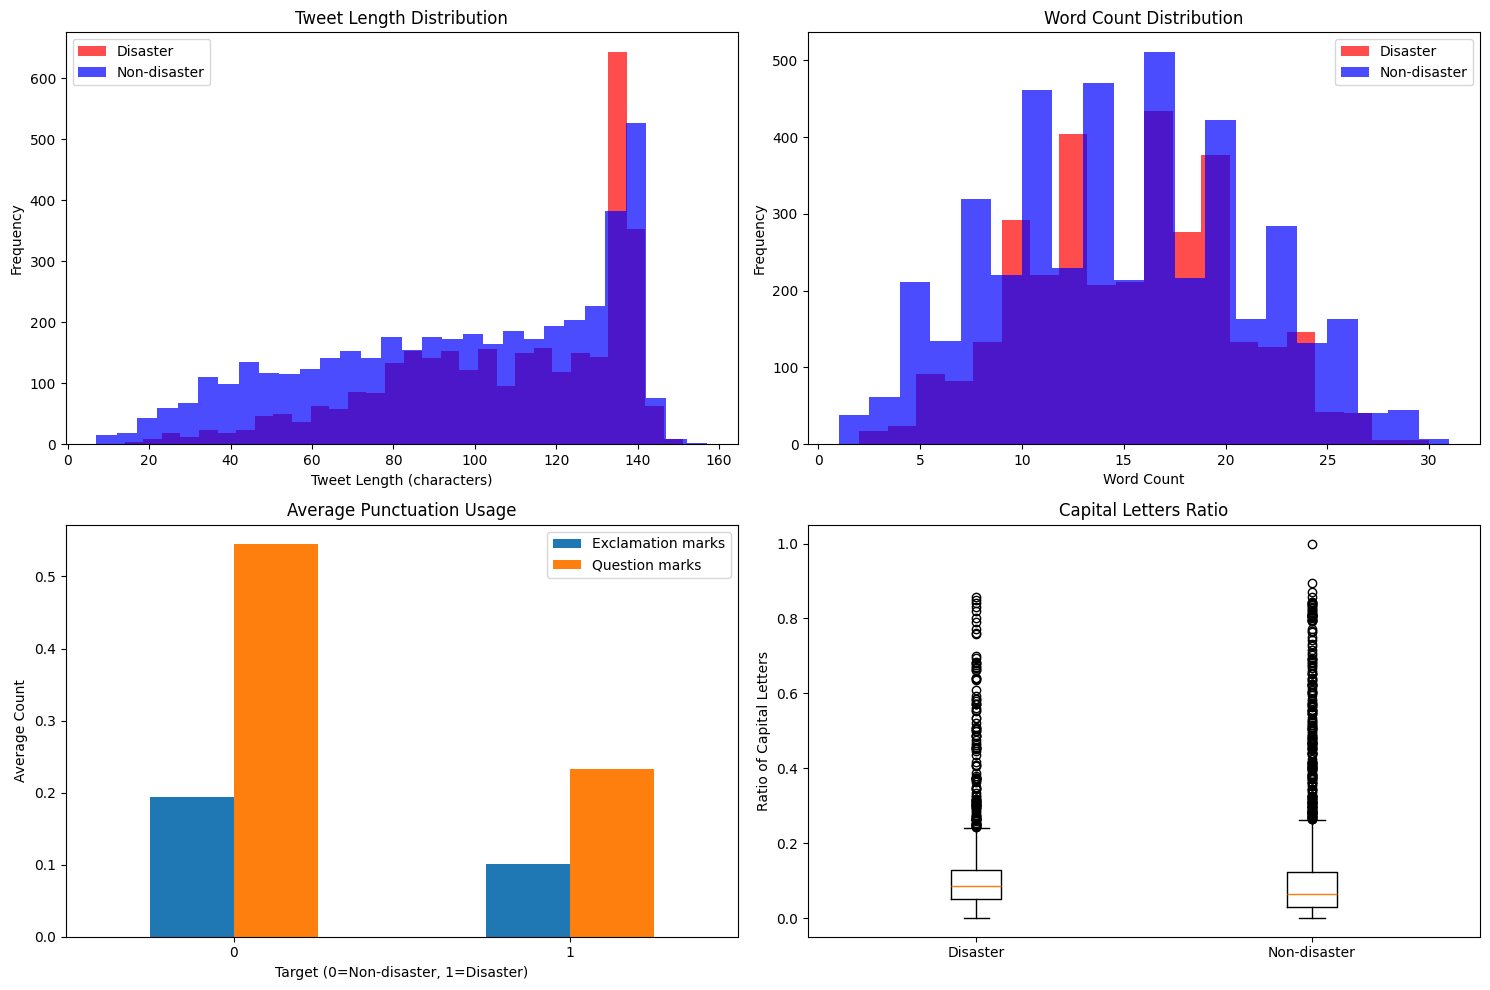

Tweet Length Statistics:
Disaster tweets - Mean: 108.1, Std: 29.3
Non-disaster tweets - Mean: 95.7, Std: 35.9

Punctuation Statistics:
        exclamation_count  question_count
target                                   
0                0.194150        0.544450
1                0.100887        0.232956


In [17]:
# Analyze tweet length patterns between disaster and non-disaster tweets
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tweet length distribution
disaster_lengths = df[df['target'] == 1]['text'].str.len()
non_disaster_lengths = df[df['target'] == 0]['text'].str.len()

axes[0,0].hist(disaster_lengths, bins=30, alpha=0.7, label='Disaster', color='red')
axes[0,0].hist(non_disaster_lengths, bins=30, alpha=0.7, label='Non-disaster', color='blue')
axes[0,0].set_xlabel('Tweet Length (characters)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Tweet Length Distribution')
axes[0,0].legend()

# Word count distribution
disaster_word_counts = df[df['target'] == 1]['text'].str.split().str.len()
non_disaster_word_counts = df[df['target'] == 0]['text'].str.split().str.len()

axes[0,1].hist(disaster_word_counts, bins=20, alpha=0.7, label='Disaster', color='red')
axes[0,1].hist(non_disaster_word_counts, bins=20, alpha=0.7, label='Non-disaster', color='blue')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Word Count Distribution')
axes[0,1].legend()

# Exclamation marks and question marks frequency
df['exclamation_count'] = df['text'].str.count('!')
df['question_count'] = df['text'].str.count('\?')

# Group by target and calculate mean
punctuation_stats = df.groupby('target')[['exclamation_count', 'question_count']].mean()

punctuation_stats.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Punctuation Usage')
axes[1,0].set_xlabel('Target (0=Non-disaster, 1=Disaster)')
axes[1,0].set_ylabel('Average Count')
axes[1,0].legend(['Exclamation marks', 'Question marks'])
axes[1,0].tick_params(axis='x', rotation=0)

# Capital letters ratio
df['capital_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

disaster_caps = df[df['target'] == 1]['capital_ratio']
non_disaster_caps = df[df['target'] == 0]['capital_ratio']

axes[1,1].boxplot([disaster_caps, non_disaster_caps], labels=['Disaster', 'Non-disaster'])
axes[1,1].set_title('Capital Letters Ratio')
axes[1,1].set_ylabel('Ratio of Capital Letters')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Tweet Length Statistics:")
print(f"Disaster tweets - Mean: {disaster_lengths.mean():.1f}, Std: {disaster_lengths.std():.1f}")
print(f"Non-disaster tweets - Mean: {non_disaster_lengths.mean():.1f}, Std: {non_disaster_lengths.std():.1f}")

print("\nPunctuation Statistics:")
print(punctuation_stats)

### Summary of Predictability Analysis

Based on our analysis, the disaster tweets appear to be predictable for several reasons:

#### 1. **Distinctive Vocabulary**
- Disaster tweets contain specific keywords related to emergencies, accidents, and catastrophes
- Words like "fire", "earthquake", "flood", "emergency", "rescue" are strong predictors
- The vocabulary difference between disaster and non-disaster tweets is quite pronounced

#### 2. **Linguistic Patterns**
- **Tweet Length**: Disaster tweets may have different average lengths
- **Punctuation Usage**: Different usage patterns of exclamation marks and question marks
- **Capitalization**: Potential differences in capital letter usage (indicating urgency/emotion)

#### 3. **Content Characteristics**
- Disaster tweets often contain:
  - Action words (rescue, evacuation, emergency)
  - Damage-related terms (destroyed, injured, casualties)
  - Location references with emergency context
  - Time-sensitive language

#### 4. **Implications for Modeling**
- The clear vocabulary differences suggest that simple text-based features will be effective
- TF-IDF or word embeddings should capture these patterns well
- The predictability indicates good potential for high model accuracy
- Feature engineering around disaster-specific keywords could be valuable

This analysis confirms that the tweet classification task should be quite achievable with standard NLP techniques, as there are clear linguistic and semantic differences between the two classes.